In [1]:
from glob import glob
import os
from os.path import join
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [4]:
save_locs = ["/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_fcnn_scaled_train/analysis_test/",
             ]

In [5]:
dfs = [pd.read_parquet(join(loc, "ensemble_eval.parquet") ) for loc in save_locs]


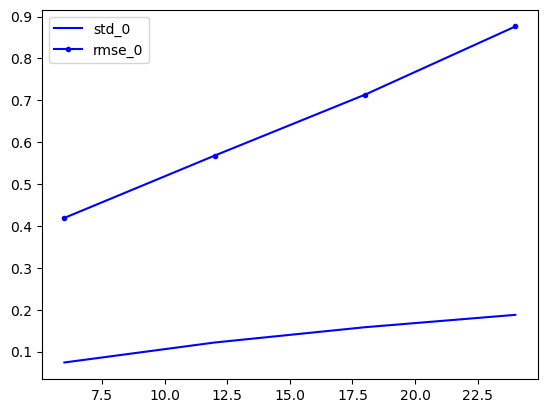

In [7]:
def plot_std_rmse(dfs):
    for i,df in enumerate(dfs):
        plt.plot(df.forecast_hour, df.std_global_U_24, label=f"std_{i}", color="b", alpha=1/(i+1))
        plt.plot(df.forecast_hour, df.rmse_global_U_24, label=f"rmse_{i}", marker='.', color="b", alpha=1/(i+1))
        plt.legend()

    plt.show()
plot_std_rmse(dfs)


# Per-forecast hour analysis
ex. 

## note: need to extract np arrays with .item() or indexing by [0]


In [8]:
df = dfs[0]
subdf = df[df.forecast_hour == 6]

### zonal energy spectrum

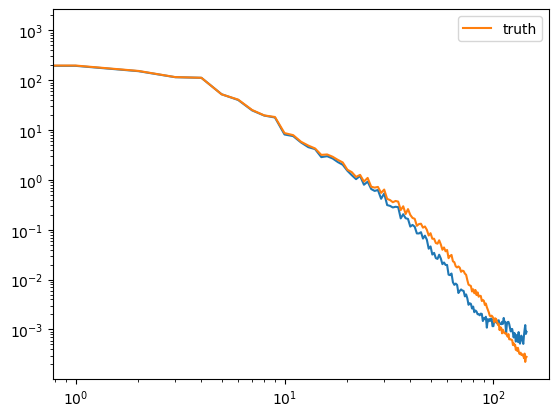

In [24]:
spectrum = subdf.zonal_spectrum_U_20.item()
wavenums = np.arange(len(spectrum))
plt.loglog(wavenums, spectrum)
plt.loglog(wavenums, subdf.zonal_spectrum_U_20_truth[0], label="truth")
plt.legend()

### spread-reliability

(0.0, 1.384818156854566)

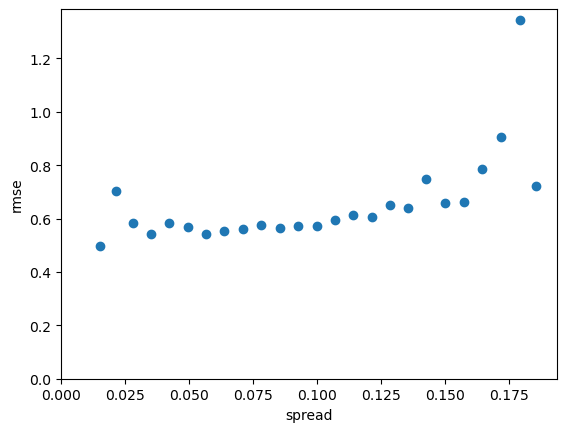

In [14]:
plt.scatter(subdf.spread_means_U_20[0], subdf.rmse_means_U_20[0])
plt.xlabel("spread")
plt.ylabel("rmse")
plt.xlim(0)
plt.ylim(0)

### rank histogram

Text(0, 0.5, 'count')

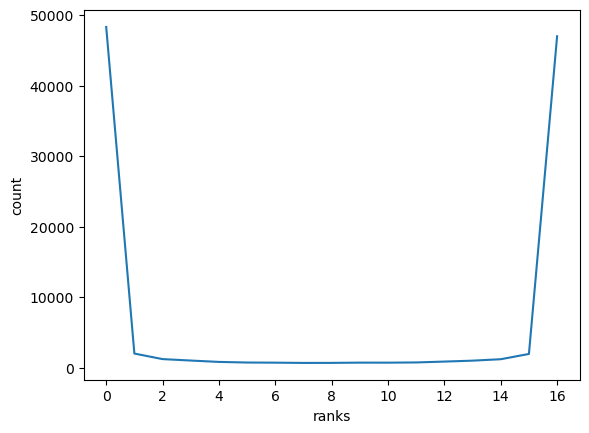

In [ ]:
plt.plot(np.arange(len(subdf['rank_hist_U_20'].item())), subdf['rank_hist_U_20'].item())


plt.xlabel("ranks")
plt.ylabel("count")

### spectrum of divergent and rotational components

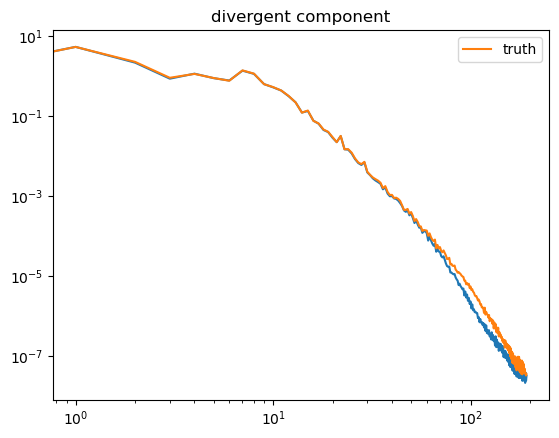

In [26]:
spectrum = subdf.div_spectrum_20.item()
wavenums = np.arange(len(spectrum))
plt.loglog(wavenums, spectrum)
plt.loglog(wavenums, subdf.div_spectrum_20_truth[0], label="truth")
plt.title("divergent component")
plt.legend()

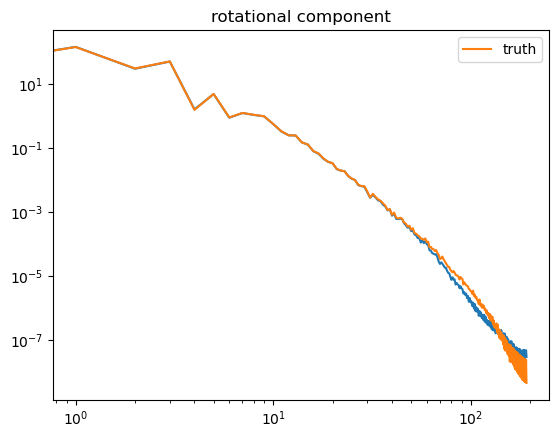

In [25]:
spectrum = subdf.vrt_spectrum_20.item()
wavenums = np.arange(len(spectrum))
plt.loglog(wavenums, spectrum)
plt.loglog(wavenums, subdf.vrt_spectrum_20_truth[0], label="truth")
plt.title("rotational component")
plt.legend()